In [1]:
#Question No. 2     Dataset:- 'gas_turbines.csv'
#Predicting turbine energy yield (TEY) using ambient variables as features.


In [2]:
#Applying the Feature Engineering for selecting important feature for build the Neural Network model

####Univariate feature selection

In [3]:
#Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas as pd
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#load data
filename = 'gas_turbines.csv'
names = ['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX','TEY']
dataframe = read_csv(filename, names=names, header=0)
dataframe

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
dataframe.dtypes 

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
CDP     float64
CO      float64
NOX     float64
TEY     float64
dtype: object

In [5]:
dataframe.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [6]:
#Convert data type from continuous into categorical data type by using some condition & applying (cut) function & creating new column[TEY1]
#TEY<75.000000 = Lower
#TEY>119.890000 = Higher
category=pd.cut(dataframe.TEY,bins=[0.000000,75.00000,119.890000],labels=['Low','High'])
dataframe.insert(11,'TEY1',category) 
dataframe 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY,TEY1
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722,High
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776,High
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468,High
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670,High
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311,High
...,...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559,High
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917,High
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912,High
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227,High


In [7]:
#Drop the column which is not necessary for the futher procedure of NN use only TEY criteria for classifying it
dataframe=dataframe.drop(['TEY'],axis=1)
dataframe

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY1
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,High
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,High
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,High
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,High
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,High
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,High
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,High
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,High
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,High


In [8]:
#Rename the column
dataframe=dataframe.rename({"TEY1":"TEY"},axis=1)
dataframe 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,High
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,High
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,High
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,High
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,High
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,High
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,High
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,High
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,High


In [9]:
#Covert the categorical data into numbers 
dataframe[['TEY']]=dataframe[['TEY']].apply(lambda x: pd.factorize(x)[0])
dataframe[['TEY']]

,TEY
0,0
1,0
2,0
3,0
4,0
...,...
15034,0
15035,0
15036,0
15037,0


In [10]:
X=dataframe.iloc[:,0:-1] 
X 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494


In [11]:
Y = dataframe.iloc[:,-1] 
Y

0        0
1        0
2        0
3        0
4        0
        ..
15034    0
15035    0
15036    0
15037    0
15038    0
Name: TEY, Length: 15039, dtype: int64

In [12]:
#feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
#summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)


#For regression: f_regression, mutual_info_regression
#For classification: chi2, f_classif, mutual_info_classif

[14082.25     38.215  1242.077    58.718   982.662   309.634    30.903
  1123.982   109.251  2462.499]


####Recursive Feature Elimination

In [13]:
#Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#load data
filename = 'gas_turbines.csv'
names = ['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX','TEY']
dataframe = read_csv(filename, names=names, header=0)

In [14]:
#Convert data type from continuous into categorical data type by using some condition & applying (cut) function & creating new column[TEY1]
#TEY<75.000000 = Lower
#TEY>119.890000 = Higher
category=pd.cut(dataframe.TEY,bins=[0.000000,75.00000,119.890000],labels=['Low','High'])
dataframe.insert(11,'TEY1',category) 
dataframe 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY,TEY1
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722,High
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776,High
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468,High
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670,High
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311,High
...,...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559,High
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917,High
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912,High
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227,High


In [15]:
#Drop the column which is not necessary for the futher procedure of NN use only TEY criteria for classifying it
dataframe=dataframe.drop(['TEY'],axis=1)
dataframe

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY1
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,High
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,High
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,High
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,High
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,High
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,High
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,High
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,High
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,High


In [16]:
#Rename the column
dataframe=dataframe.rename({"TEY1":"TEY"},axis=1)
dataframe 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,High
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,High
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,High
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,High
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,High
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,High
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,High
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,High
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,High


In [17]:
#Covert the categorical data into numbers 
dataframe[['TEY']]=dataframe[['TEY']].apply(lambda x: pd.factorize(x)[0])
dataframe[['TEY']]

,TEY
0,0
1,0
2,0
3,0
4,0
...,...
15034,0
15035,0
15036,0
15037,0


In [18]:
X=dataframe.iloc[:,0:-1] 
X 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494


In [19]:
Y = dataframe.iloc[:,-1] 
Y

0        0
1        0
2        0
3        0
4        0
        ..
15034    0
15035    0
15036    0
15037    0
15038    0
Name: TEY, Length: 15039, dtype: int64

In [20]:
#feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model)
fit = rfe.fit(X, Y)
import matplotlib.pyplot as plt
plt.show()

In [21]:
#Num Features: 
fit.n_features_

5

In [22]:
#Selected Features:
fit.support_

array([ True, False, False,  True,  True, False, False,  True, False,
        True])

In [23]:
#Feature Ranking:
fit.ranking_

array([1, 4, 2, 1, 1, 3, 5, 1, 6, 1])

####Feature Importance using Decision Tree

In [24]:
#Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.tree import  DecisionTreeClassifier
#load data
filename = 'gas_turbines.csv'
names = ['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX','TEY']
dataframe = read_csv(filename, names=names, header=0)

In [25]:
#Convert data type from continuous into categorical data type by using some condition & applying (cut) function & creating new column[TEY1]
#TEY<75.000000 = Lower
#TEY>119.890000 = Higher
category=pd.cut(dataframe.TEY,bins=[0.000000,75.00000,119.890000],labels=['Low','High'])
dataframe.insert(11,'TEY1',category) 
dataframe 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY,TEY1
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722,High
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776,High
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468,High
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670,High
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311,High
...,...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559,High
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917,High
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912,High
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227,High


In [26]:
#Drop the column which is not necessary for the futher procedure of NN use only TEY criteria for classifying it
dataframe=dataframe.drop(['TEY'],axis=1)
dataframe

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY1
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,High
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,High
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,High
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,High
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,High
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,High
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,High
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,High
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,High


In [27]:
#Rename the column
dataframe=dataframe.rename({"TEY1":"TEY"},axis=1)
dataframe 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,High
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,High
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,High
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,High
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,High
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,High
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,High
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,High
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,High


In [28]:
#Covert the categorical data into numbers 
dataframe[['TEY']]=dataframe[['TEY']].apply(lambda x: pd.factorize(x)[0])
dataframe[['TEY']]

,TEY
0,0
1,0
2,0
3,0
4,0
...,...
15034,0
15035,0
15036,0
15037,0


In [29]:
X=dataframe.iloc[:,0:-1] 
X 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494


In [30]:
Y = dataframe.iloc[:,-1] 
Y

0        0
1        0
2        0
3        0
4        0
        ..
15034    0
15035    0
15036    0
15037    0
15038    0
Name: TEY, Length: 15039, dtype: int64

In [31]:
#feature extraction
model = DecisionTreeClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.389 0.035 0.059 0.044 0.027 0.078 0.026 0.016 0.28  0.046]


#### Build a NEURAL NETWORKS model for Predict the TEY by using only important feature which we have got from Feature Engineering technique

In [32]:
# Importing the necessary packages
from pandas import read_csv
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler 

In [33]:
# load forestfires dataset
filename = 'gas_turbines.csv'
names = ['AT','CO','TEY']
dataframe = read_csv(filename, names=names, header=0)
array = dataframe.values 
dataframe 

,,,,,,,,AT,CO,TEY
6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [34]:
#Convert data type from continuous into categorical data type by using some condition & applying (cut) function & creating new column[TEY1]
#TEY<75.000000 = Lower
#TEY>119.890000 = Higher
category=pd.cut(dataframe.TEY,bins=[0.000000,75.00000,119.890000],labels=['Low','High'])
dataframe.insert(3,'TEY1',category) 
dataframe

,,,,,,,,AT,CO,TEY,TEY1
6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722,High
6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776,High
6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468,High
7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670,High
7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311,High
...,...,...,...,...,...,...,...,...,...,...,...
9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559,High
7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917,High
7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912,High
7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227,High


In [35]:
#Drop the column which is not necessary for the futher procedure of NN use only TEY criteria for classifying it
dataframe=dataframe.drop(['TEY'],axis=1)
dataframe

,,,,,,,,AT,CO,TEY1
6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,High
6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,High
6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,High
7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,High
7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,High
...,...,...,...,...,...,...,...,...,...,...
9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,High
7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,High
7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,High
7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,High


In [36]:
#Rename the column
dataframe=dataframe.rename({"TEY1":"TEY"},axis=1)
dataframe 

,,,,,,,,AT,CO,TEY
6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,High
6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,High
6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,High
7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,High
7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,High
...,...,...,...,...,...,...,...,...,...,...
9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,High
7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,High
7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,High
7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,High


In [37]:
#Covert the categorical data into numbers 
dataframe[['TEY']]=dataframe[['TEY']].apply(lambda x: pd.factorize(x)[0])
dataframe[['TEY']]

,,,,,,,,TEY
6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,0
6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,0
6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,0
7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,0
7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,0
...,...,...,...,...,...,...,...,...
9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,0
7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,0
7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,0
7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,0


In [38]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15039 entries, (6.8594, 1007.9, 96.799, 3.5, 19.663, 1059.2, 550.0, 114.7) to (6.9279, 1007.2, 97.533, 3.4275, 19.306, 1049.9, 545.85, 111.58)
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   CO      15039 non-null  float64
 2   TEY     15039 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 MB


In [39]:
X = array[:,0:2]
y = array[:,2]

In [40]:
X

array([[10.605,  3.155],
       [10.598,  3.236],
       [10.601,  3.201],
       ...,
       [10.483,  7.963],
       [10.533,  6.249],
       [10.583,  4.982]])

In [41]:
y

array([82.722, 82.776, 82.468, ..., 90.912, 93.227, 92.498])

In [42]:
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X) 

####Tuning of Hyperparameters :- Batch Size and Epochs

In [43]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [44]:
# create model
def create_model():
    model = Sequential()
#No. of neurons in input layer= 12 & input_dimension= No.of independent variables=2
    model.add(Dense(12, input_dim=2, kernel_initializer='random_uniform', activation='relu'))
#No. of neurons in hidden layer= 8    
    model.add(Dense(8, kernel_initializer='random_uniform', activation='relu'))
#No. of neurons in output layer    
    model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))
#Optimizers= Adam & learning rate(lr= 0.01)    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]# Find out what is the best batch size among this list[10,20,40]
epochs = [10,50,100]# Find out what is best epochs value among this list[10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  46.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  26.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  26.5s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  42.0s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  42.2s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=0.000 total time= 2.1min
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END .....batch_size=10, epochs=50;, score=0.000 total time= 2.1min
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END .....batch_size=10, epochs=50;, score=0.000 total time= 2.4min
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END .....batch_size=10, epochs=50;, score=0.000 total time= 2.4min
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END .....batch_size=10, epochs=50;, score=0.000 total time= 2.1min
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END ....batch_size=10, epochs=100;, score=0.000 total time= 4.4min
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END ....batch_size=10, epochs=100;, score=0.000 total time= 4.2min
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END ....batch_size=10, epochs=100;, score=0.000 total time= 4.2min
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END ....batch_size=10, epochs=100;, score=0.000 total time= 4.2min
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END ....batch_size=10, epochs=100;, score=0.000 total time= 4.4min
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .....batch_size=20, epochs=10;, score=0.000 total time=  13.4s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .....batch_size=20, epochs=10;, score=0.000 total time=  13.5s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .....batch_size=20, epochs=10;, score=0.000 total time=  21.4s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .....batch_size=20, epochs=10;, score=0.000 total time=  21.3s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .....batch_size=20, epochs=10;, score=0.000 total time=  13.4s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END .....batch_size=20, epochs=50;, score=0.000 total time= 1.1min
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END .....batch_size=20, epochs=50;, score=0.000 total time= 1.1min
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END .....batch_size=20, epochs=50;, score=0.000 total time= 1.1min
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END .....batch_size=20, epochs=50;, score=0.000 total time= 1.1min
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END .....batch_size=20, epochs=50;, score=0.000 total time= 1.1min
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END ....batch_size=20, epochs=100;, score=0.000 total time= 2.4min
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END ....batch_size=20, epochs=100;, score=0.000 total time= 2.1min
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END ....batch_size=20, epochs=100;, score=0.000 total time= 2.2min
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END ....batch_size=20, epochs=100;, score=0.000 total time= 2.4min
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END ....batch_size=20, epochs=100;, score=0.000 total time= 2.1min
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .....batch_size=40, epochs=10;, score=0.000 total time=  11.0s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .....batch_size=40, epochs=10;, score=0.000 total time=   6.9s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .....batch_size=40, epochs=10;, score=0.000 total time=   7.0s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.000 total time=  10.9s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.000 total time=  10.9s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=0.000 total time=  32.1s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.000 total time=  32.1s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.000 total time=  41.7s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.000 total time=  32.0s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.000 total time=  41.7s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=0.000 total time= 1.4min
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.000 total time= 1.4min
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.000 total time= 1.1min
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.7305825233459473, using {'batch_size': 10, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 10, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 10, 'epochs': 50}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 10, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 50}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 50}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 100}


####Tuning of Hyperparameters:- Learning rate and Drop out rate

In [ ]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 2,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 2,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]# To find out among these list what should be the value of learning rate
dropout_rate = [0.0,0.1,0.2]# To find out among these list what should be the value of dropout rate

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   1.9s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.750 total time=   1.7s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.524 total time=   2.0s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.680 total time=   1.9s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.699 total time=   1.9s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   2.0s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.750 total time=   2.0s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.524 total time=   1.7s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.680 total time=   1.9s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.699 total time=   1.9s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   1.7s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.750 total time=   1.8s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.524 total time=   1.9s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.680 total time=   1.7s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.699 total time=   1.9s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   2.0s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.750 total time=   1.7s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.524 total time=   2.0s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.680 total time=   2.4s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.699 total time=   2.0s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=1.000 total time=   2.0s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.750 total time=   2.0s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.524 total time=   1.8s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.680 total time=   1.7s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.699 total time=   1.7s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=1.000 total time=   2.0s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.750 total time=   2.0s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.524 total time=   1.8s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.680 total time=   2.0s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.699 total time=   2.0s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=1.000 total time=   2.1s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.750 total time=   2.0s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.524 total time=   1.8s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.680 total time=   2.0s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.699 total time=   2.0s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=1.000 total time=   1.8s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.750 total time=   2.0s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.524 total time=   1.8s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.680 total time=   2.0s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.699 total time=   2.0s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=   1.8s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.750 total time=   2.4s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.524 total time=   1.8s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.680 total time=   2.0s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.699 total time=   1.8s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.7305825233459473, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


####Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [ ]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
#8= No. of neurons in input layer
    model.add(Dense(8,input_dim = 2,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
#4= No. of neurons in hidden layer
    model.add(Dense(4,input_dim = 2,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
#1= No. of neurons in output layer    
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']#Tuned activation fun. which is best? among all of these activation fun
init = ['uniform','normal','zero']#Tuned weight initialization which is best? among all of these weight initialization

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   2.0s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   1.8s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   2.0s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.680 total time=   1.7s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   1.7s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=1.000 total time=   1.7s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.750 total time=   2.0s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.524 total time=   2.4s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.680 total time=   1.7s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.699 total time=   2.0s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=1.000 total time=   2.0s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.750 total time=   1.7s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.524 total time=   2.0s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.680 total time=   1.9s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.699 total time=   2.0s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   2.0s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.750 total time=   2.0s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.524 total time=   1.6s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.680 total time=   2.0s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.699 total time=   2.3s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   1.7s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.750 total time=   2.0s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.524 total time=   1.7s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.680 total time=   2.0s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.699 total time=   2.0s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=1.000 total time=   1.7s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.750 total time=   2.0s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.524 total time=   1.7s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.680 total time=   1.7s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.699 total time=   1.7s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   1.9s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.750 total time=   2.0s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.515 total time=   2.3s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.680 total time=   2.0s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.689 total time=   2.0s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   1.7s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.750 total time=   1.9s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.515 total time=   2.0s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.680 total time=   1.7s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.689 total time=   1.6s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=1.000 total time=   1.9s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.750 total time=   1.7s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.524 total time=   2.0s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.680 total time=   1.7s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.699 total time=   2.4s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   2.1s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.750 total time=   2.9s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.515 total time=   2.4s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.680 total time=   1.9s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.689 total time=   2.0s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   1.9s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.750 total time=   1.9s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.515 total time=   1.6s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.680 total time=   3.2s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.689 total time=   1.6s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=1.000 total time=   1.7s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.750 total time=   1.7s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.524 total time=   2.4s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.680 total time=   2.0s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.699 total time=   1.6s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.7305825233459473, using {'activation_function': 'softmax', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.7266990184783936,0.1573864047998603 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7266990184783936,0.1573864047998603 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.7266990184783936,0.1573864047998603 with: {'activati

In [ ]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 2,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]#Tuned the No. of neurons in the activation layer or hidden layer how many neurons you should have?
# In my first hidden layer i should have 4, 8 or 16 neurons
neuron2 = [2,4,8]#Tuned the No. of neurons in the activation layer or hidden layer how many neurons you should have?
# In my 2nd activation or hidden layer i should have 2, 4 or 8 neurons

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   1.7s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.750 total time=   1.7s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.524 total time=   2.1s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.680 total time=   1.7s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.699 total time=   1.7s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=1.000 total time=   2.0s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.750 total time=   2.0s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.524 total time=   1.8s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.680 total time=   1.7s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.699 total time=   2.0s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END .........neuron1=4, neuron2=8;, score=1.000 total time=   1.8s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.750 total time=   2.0s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.524 total time=   1.7s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.680 total time=   2.0s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.699 total time=   2.1s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .........neuron1=8, neuron2=2;, score=1.000 total time=   1.7s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.750 total time=   1.8s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.524 total time=   2.0s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.680 total time=   2.0s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.699 total time=   1.7s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END .........neuron1=8, neuron2=4;, score=1.000 total time=   1.9s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.750 total time=   2.0s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.524 total time=   2.0s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.680 total time=   2.0s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.699 total time=   2.0s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END .........neuron1=8, neuron2=8;, score=1.000 total time=   1.7s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.750 total time=   2.0s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.524 total time=   2.4s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.680 total time=   1.7s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.699 total time=   2.0s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END ........neuron1=16, neuron2=2;, score=1.000 total time=   3.4s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.750 total time=   1.9s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.476 total time=   1.7s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.680 total time=   2.0s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.699 total time=   1.7s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END ........neuron1=16, neuron2=4;, score=1.000 total time=   2.0s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.750 total time=   2.0s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.524 total time=   2.0s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.680 total time=   1.7s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.699 total time=   2.4s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END ........neuron1=16, neuron2=8;, score=1.000 total time=   1.8s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.750 total time=   2.0s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.524 total time=   1.7s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.680 total time=   2.0s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.699 total time=   1.7s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.7305825233459473, using {'neuron1': 4, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 8}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 8}
0.7208737850189209,0.16794994181639633 with: {'neuron1': 16, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 16, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 16, 'neuron2': 8}


####Training model with optimum values of Hyperparameters

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(4,input_dim = 2,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(2,input_dim = 2,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y,y_predict))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


0.7311411992263056


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
filename = 'gas_turbines.csv'
names = ['AT','CO','TEY']
dataset1 = read_csv(filename, names=names, header=0)
dataset1

month  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0      1   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0      0   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0      0   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0      1   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0      1   
...                                                                                ...   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0      0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0      0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0      0   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0      0   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0      0   

                                                                                 RH  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0   0   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0   0   
...                                                                              ..   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0   0   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   

                                                                                 DC  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   0   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0   0   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0   0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0   0   
...                                                                              ..   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0   0   
    sat 94.4 146.0 614.7 11.3 25.6 42 4.0 0.0 0.00  0 0 1 0 0 0 0 0 1 0 0 0 0 0   0   
nov tue 79.5 3.0   106.7 1.1  11.8 31 4.5 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0   1   

                                                                                 DMC  \
mar fri 86.2 26.2  94.3  5.1  8.2  51 6.7 0.0 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0    0   
oct tue 90.6 35.4  669.1 6.7  18.0 33 0.9 0.0 0.00  0 0 0 0 0 1 0 0 0 0 0 0 0 0    1   
    sat 90.6 43.7  686.9 6.7  14.6 33 1.3 0.0 0.00  0 0 1 0 0 0 0 0 0 0 0 0 0 0    1   
mar fri 91.7 33.3  77.5  9.0  8.3  97 4.0 0.2 0.00  1 0 0 0 0 0 0 0 0 0 0 0 0 0    0   
    sun 89.3 51.3  102.2 9.6  11.4 99 1.8 0.0 0.00  0 0 0 1 0 0 0 0 0 0 0 0 0 0    0   
...                                                                              ...   
aug sun 81.6 56.7  665.6 1.9  27.8 32 2.7 0.0 6.44  0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
                              21.9 71 5.8 0.0 54.29 0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
                              21.2 70 6.7 0.0 11.16 0 0 0 1 0 0 0 0 1 0 0 0 0 0    0   
    sat 94.4 146.0 614.7 11.3 

In [ ]:
X=dataset1.iloc[:,0:2] 


In [ ]:
y=dataset1.iloc[:,2] 

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
history = model.fit(X, y, epochs=100,validation_split=0.33, batch_size=10)

Epoch 1/100
35/35 [==============================] - 1s 9ms/step - loss: 0.9621 - accuracy: 0.2428 - val_loss: 0.8861 - val_accuracy: 0.3216
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 0.9263 - accuracy: 0.2428 - val_loss: 0.8577 - val_accuracy: 0.3216
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 0.8927 - accuracy: 0.2428 - val_loss: 0.8324 - val_accuracy: 0.3216
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 0.8620 - accuracy: 0.2428 - val_loss: 0.8087 - val_accuracy: 0.3216
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 0.8340 - accuracy: 0.2428 - val_loss: 0.7870 - val_accuracy: 0.3216
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.8071 - accuracy: 0.2428 - val_loss: 0.7687 - val_accuracy: 0.3216
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 0.7835 - accuracy: 0.2428 - val_loss: 0.7509 - val_accuracy: 0.3216
Epoch 8/100
3

In [ ]:
# evaluate the keras model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7311
accuracy: 73.11%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


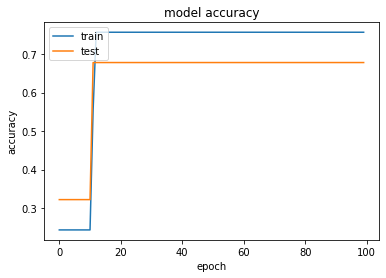

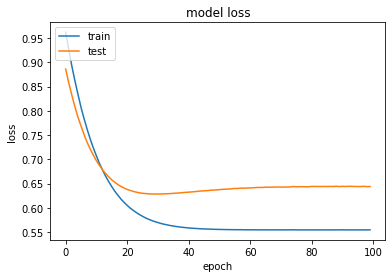

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()